In [1]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from scipy import spatial
import scipy

In [2]:
points = {'A':(2,3),
          'B':(7,9),
          'C':(11,4),
          'D':(3,3),
          'E':(14,12),
          'F':(4,5),
          'G':(12,5),
          'H':(9,7),
          'J':(6,4),
          'K':(2,9),
          'L':(4,7),
          'M':(6,8)}

XY = np.array(list(points.values()))
X_labels = np.array(list(points.keys())) # global variable used for functions CompiteDistance

N=3

In [104]:
def WeightMatrix(X, n):
    weightm = np.zeros((len(X), len(X)))
#     print(weightm)
    for i in range(len(X)):
        nnearest, weights = FindNearestNeighbors(X, i, n)
        for index in range(len(nnearest)):
            weightm[i][nnearest[index]]=weights[index]
            weightm[nnearest[index]][i]=weights[index]
    
    return weightm


def FindNearestNeighbors(X, i, n):
    
    for ik in range(len(X)):
        dist = ComputeDistance(X, i) #dist is a dict with distance as keys and point indexes as values
        firstn = sorted(dist.keys(), reverse=False)[:n+1]
        nearest = [dist[n] for n in firstn]
        distances = firstn

    return nearest, distances

def ComputeDistance(X, i):
    dist={}
    for j in range(len(X)):
        if j!=i:
            d = np.sqrt(np.sum((X[i]-X[j])**2))
#             d = 1 - spatial.distance.cosine(X[i], X[j])
            dist[d]=j
        else:
            dist[0]=j
    return dist


def DegreeMatrix(w):
    degree_vector = []
    
    for i in range(w.shape[0]):
        degree=0
        # sum of weights for each row is the degree
        degree_vector = np.sum(w, axis=1)
#         for j in range(w.shape[1]):
#             if w[i][j]>0:
#                 degree = degree+1 # adding 1 for each  non zero weight
                
#         degree_vector.append(degree)
    
    degree_matrix = np.diag(degree_vector)
    
    return degree_matrix

def SimilarityMatrix(w, sigma):
    return np.exp(-w**2/(2.*sigma**2))

def AdjacencyMatrix(X, n):
    adjm = np.zeros((len(X), len(X)))
#     print(weightm)
    for i in range(len(X)):
        nnearest, weights = FindNearestNeighbors(X, i, n)
        for index in range(len(nnearest)):
            adjm[i][nnearest[index]]=1
            adjm[nnearest[index]][i]=1
    
    return adjm

In [105]:
W = WeightMatrix(XY, N)
D = DegreeMatrix(W)

In [118]:
A = AdjacencyMatrix(XY, N)
pd.DataFrame(A).to_csv('adj.csv')

In [18]:
S = SimilarityMatrix(W, 5)

In [60]:
L=D-W

In [61]:
import pandas as pd
dfw = pd.DataFrame(W)
dfL=pd.DataFrame(L)
dfd=pd.DataFrame(D)
dfS=pd.DataFrame(S)
dfS

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.000000,1.000000,1.000000,0.980199,1.000000,0.852144,1.000000,1.000000,0.711770,1.000000,1.000000,1.000000
1,1.000000,1.000000,1.000000,1.000000,0.313486,1.000000,1.000000,0.852144,1.000000,1.000000,0.771052,0.960789
2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.960789,0.771052,0.606531,1.000000,1.000000,1.000000
3,0.980199,1.000000,1.000000,1.000000,1.000000,0.904837,1.000000,1.000000,0.818731,1.000000,1.000000,1.000000
4,1.000000,0.313486,1.000000,1.000000,1.000000,1.000000,0.346456,0.367879,1.000000,1.000000,1.000000,1.000000
5,0.852144,1.000000,1.000000,0.904837,1.000000,1.000000,1.000000,1.000000,0.904837,0.670320,0.923116,1.000000
6,1.000000,1.000000,0.960789,1.000000,0.346456,1.000000,1.000000,0.771052,0.477114,1.000000,1.000000,1.000000
7,1.000000,0.852144,0.771052,1.000000,0.367879,1.000000,0.771052,1.000000,1.000000,1.000000,1.000000,0.818731
8,0.711770,1.000000,0.606531,0.818731,1.000000,0.904837,0.477114,1.000000,1.000000,1.000000,0.771052,1.000000
9,1.000000,1.000000,1.000000,1.000000,1.000000,0.670320,1.000000,1.000000,1.000000,1.000000,0.852144,0.711770


In [62]:
dfL

,0,1,2,3,4,5,6,7,8,9,10,11
0,7.951533,0.000000,0.000000,-1.000000,0.000000,-2.828427,0.000000,0.000000,-4.123106,0.000000,0.000000,0.000000
1,0.000000,15.463965,0.000000,0.000000,-7.615773,0.000000,0.000000,-2.828427,0.000000,0.000000,-3.605551,-1.414214
2,0.000000,0.000000,10.019765,0.000000,0.000000,0.000000,-1.414214,-3.605551,-5.000000,0.000000,0.000000,0.000000
3,-1.000000,0.000000,0.000000,6.398346,0.000000,-2.236068,0.000000,0.000000,-3.162278,0.000000,0.000000,0.000000
4,0.000000,-7.615773,0.000000,0.000000,21.966951,0.000000,-7.280110,-7.071068,0.000000,0.000000,0.000000,0.000000
5,-2.828427,0.000000,0.000000,-2.236068,0.000000,13.772699,0.000000,0.000000,-2.236068,-4.472136,-2.000000,0.000000
6,0.000000,0.000000,-1.414214,0.000000,-7.280110,0.000000,18.382637,-3.605551,-6.082763,0.000000,0.000000,0.000000
7,0.000000,-2.828427,-3.605551,0.000000,-7.071068,0.000000,-3.605551,20.272875,0.000000,0.000000,0.000000,-3.162278
8,-4.123106,0.000000,-5.000000,-3.162278,0.000000,-2.236068,-6.082763,0.000000,24.209765,0.000000,-3.605551,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,-4.472136,0.000000,0.000000,0.000000,11.423669,-2.828427,-4.123106


In [115]:
from decorator import decorator
print(nx.__version__)

AttributeError: 'function' object has no attribute '__version__'

NetworkXError: random_state_index is incorrect

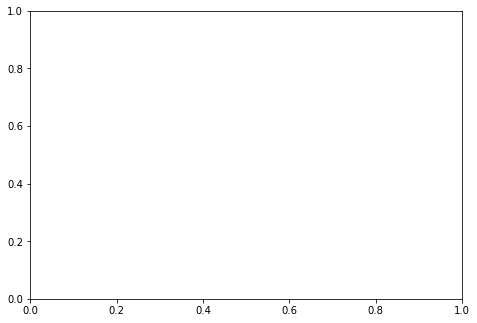

In [117]:
import matplotlib.pyplot as plt
import networkx as nx

def show_graph_with_labels(adjacency_matrix, mylabels):
    rows, cols = np.where(adjacency_matrix == 1)
    edges = zip(rows.tolist(), cols.tolist())
    gr = nx.Graph()
    gr.add_edges_from(edges)
    nx.draw(gr, labels=mylabels, with_labels=True)
    plt.show()

show_graph_with_labels(A, X_labels)

In [68]:
w, v = np.linalg.eigh(L)

In [120]:
dfw = pd.DataFrame(w)
dfv = pd.DataFrame(v)
dfw.to_csv('eigenvalues.csv')
dfv.to_csv('eigenvectors.csv')

In [82]:
dfv

,0,1,2,3,4,5,6,7,8,9,10,11
0,-0.288675,0.440257,0.158703,-0.650532,-0.352214,0.293299,0.045492,0.084874,0.176599,0.079276,-0.108989,0.075889
1,-0.288675,-0.317574,0.001245,0.115956,-0.393395,-0.130873,0.300412,0.485017,0.084380,-0.435773,0.209633,0.253035
2,-0.288675,-0.137012,0.361467,-0.171271,0.747006,0.022268,0.173401,0.298647,0.039457,-0.055478,-0.229831,0.051702
3,-0.288675,0.550558,0.251129,0.707834,-0.029411,0.144082,0.026926,0.049903,0.114931,0.053219,-0.075744,0.053292
4,-0.288675,-0.334615,0.163803,0.079714,-0.296825,-0.086254,-0.213811,0.054053,0.044138,0.080084,-0.459347,-0.638726
5,-0.288675,0.303230,-0.199359,-0.092226,0.024930,-0.421628,-0.244048,0.199264,-0.702470,-0.036639,-0.051500,0.036784
6,-0.288675,-0.210252,0.248469,-0.008935,-0.056960,-0.103226,-0.353247,-0.582194,0.026464,-0.248568,-0.156689,0.495956
7,-0.288675,-0.303301,0.128886,0.041375,-0.040827,0.133352,-0.192447,0.115023,-0.097599,0.706758,0.448801,0.161807
8,-0.288675,0.106521,0.177824,-0.095311,0.122634,-0.078595,0.091114,-0.334985,-0.005436,-0.288660,0.633031,-0.488671
9,-0.288675,0.083590,-0.573466,-0.015532,0.211806,-0.187496,-0.365490,0.109144,0.592873,-0.000774,0.059422,-0.005717


In [83]:
eigen_dict={}
for j,k in enumerate(w):
    eigen_dict[k]=j
print(eigen_dict)

{-4.4140517465081495e-16: 0, 3.755301778240307: 1, 5.302286334544786: 2, 8.034543390379786: 3, 9.503819010957397: 4, 12.631108496421287: 5, 14.275052800783634: 6, 16.99641192747515: 7, 18.67845747988558: 8, 23.60040446523232: 9, 29.86796238252789: 10, 32.42811872799157: 11}


In [84]:
sorted(eigen_dict.keys())

[-4.4140517465081495e-16,
 3.755301778240307,
 5.302286334544786,
 8.034543390379786,
 9.503819010957397,
 12.631108496421287,
 14.275052800783634,
 16.99641192747515,
 18.67845747988558,
 23.60040446523232,
 29.86796238252789,
 32.42811872799157]

#### getting eigen vectors for k smallest eigen values

In [85]:
sorted_eig_index = [eigen_dict[u] for u in sorted(eigen_dict.keys())]

In [91]:
k=3
sm_eigv=[]
for u in range(k):
    sm_eigv.append(v[sorted_eig_index[u]])

In [92]:
eigv = np.transpose(sm_eigv)

In [93]:
from sklearn.cluster import KMeans

In [94]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(eigv)

KMeans(n_clusters=3)

In [95]:
kmeans.labels_

array([1, 0, 0, 1, 2, 0, 0, 0, 0, 0, 1, 0])

## using sklearn.cluster.SpectralClustering

In [27]:
from sklearn.cluster import SpectralClustering

In [100]:
model = SpectralClustering(n_clusters=3, affinity='rbf', n_neighbors=3, assign_labels='kmeans')
# model = SpectralClustering(n_clusters=3, affinity='precomputed', n_neighbors=4, assign_labels='kmeans')

In [101]:
model.fit(XY)

SpectralClustering(n_clusters=3, n_neighbors=3)

In [102]:
model.labels_

array([1, 2, 0, 1, 2, 1, 0, 2, 1, 1, 1, 2])

In [512]:
pd.DataFrame(model.affinity_matrix_)

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.000000e+00,3.221340e-27,2.442601e-36,3.678794e-01,1.921948e-98,3.354626e-04,6.813557e-46,5.900091e-29,4.139938e-08,2.319523e-16,2.061154e-09,1.562882e-18
1,3.221340e-27,1.000000e+00,1.562882e-18,2.610279e-23,6.470235e-26,1.388794e-11,1.562882e-18,3.354626e-04,5.109089e-12,1.388794e-11,2.260329e-06,1.353353e-01
2,2.442601e-36,1.562882e-18,1.000000e+00,5.900091e-29,1.979260e-32,1.928750e-22,1.353353e-01,2.260329e-06,1.388794e-11,9.221146e-47,6.470235e-26,1.562882e-18
3,3.678794e-01,2.610279e-23,5.900091e-29,1.000000e+00,1.872900e-88,6.737947e-03,1.216099e-37,2.610279e-23,4.539993e-05,8.533048e-17,4.139938e-08,1.713908e-15
4,1.921948e-98,6.470235e-26,1.979260e-32,1.872900e-88,1.000000e+00,1.950393e-65,9.602680e-24,1.928750e-22,2.572209e-56,3.572270e-67,5.166421e-55,1.804851e-35
5,3.354626e-04,1.388794e-11,1.928750e-22,6.737947e-03,1.950393e-65,1.000000e+00,1.603811e-28,2.543666e-13,6.737947e-03,2.061154e-09,1.831564e-02,2.260329e-06
6,6.813557e-46,1.562882e-18,1.353353e-01,1.216099e-37,9.602680e-24,1.603811e-28,1.000000e+00,2.260329e-06,8.533048e-17,4.186394e-51,2.937482e-30,2.862519e-20
7,5.900091e-29,3.354626e-04,2.260329e-06,2.610279e-23,1.928750e-22,2.543666e-13,2.260329e-06,1.000000e+00,1.522998e-08,9.602680e-24,1.388794e-11,4.539993e-05
8,4.139938e-08,5.109089e-12,1.388794e-11,4.539993e-05,2.572209e-56,6.737947e-03,8.533048e-17,1.522998e-08,1.000000e+00,1.562882e-18,2.260329e-06,1.125352e-07
9,2.319523e-16,1.388794e-11,9.221146e-47,8.533048e-17,3.572270e-67,2.061154e-09,4.186394e-51,9.602680e-24,1.562882e-18,1.000000e+00,3.354626e-04,4.139938e-08


In [520]:
from sklearn import datasets

def genTwoCircles(n_samples=100):
    X,y = datasets.make_circles(n_samples, factor=0.5, noise=0.05)
    return X, y

In [545]:
from matplotlib import pyplot as plt
from itertools import cycle, islice
import numpy as np

def plot(X, y_sp, y_km):
    colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                                '#f781bf', '#a65628', '#984ea3',
                                                '#999999', '#e41a1c', '#dede00']),
                                        int(max(y_km) + 1))))
    plt.subplot(121)
    plt.scatter(X[:,0], X[:,1], s=10, color=colors[y_sp])
    plt.title("Spectral Clustering")
    plt.subplot(122)
    plt.scatter(X[:,0], X[:,1], s=10, color=colors[y_km])
    plt.title("Kmeans Clustering")
    # plt.show()
    plt.savefig("../figures/spectral_clustering.png")

FileNotFoundError: [Errno 2] No such file or directory: '../figures/spectral_clustering.png'

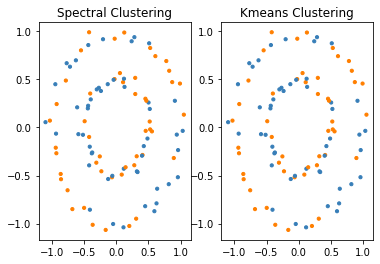

In [546]:
plot(x, kmeans.labels_, kmeans.labels_)

In [521]:
x, l = genTwoCircles()
N=2

In [522]:
x[:5]

array([[ 0.51201285,  0.8756476 ],
       [-0.77980981,  0.48813677],
       [-0.06410612, -0.51820131],
       [ 0.29605559,  0.51587715],
       [-0.41923118,  0.99059332]])

# testing nearest neighbors using dictionary keys : SUCCESS!

In [4]:
d={1:'a', 2:'b', 7:'c', 3:'d'}
type(d)

dict

In [9]:
near = sorted(d.keys())[:3]


In [10]:
nearest = [d[n] for n in near]

In [11]:
nearest

['a', 'b', 'd']